# Homework 10 (Decision Trees)

## Introduction

CoffeeStore is a coffee wholesale company that sells coffee beans and coffee eqipment to coffee shops. The company sells two types of items online as well as in a large warehouse building.

- specialty coffee beans, in bulk (bags)
- coffee equipment and merchandise (grinders, brewing equipment, mugs, etc.)

The company has the following data on its customers' past purchases in a data file named <h3 style="color:red"> CoffeeStore.xlsx file </h3>

- age
- gender 
- number of coffee bean bags the customer ordered over the preceding year
- how much they spent on coffee products in the most recent week
- how much they spent on coffee products in the most recent month
- income 
- whether they have bought at least one product online
- new_product (whether the customer bought or not when the company introduced a new coffee machine last time

##### The company is planning to introduce a new coffee machine. It is a risky decision since the product development and marketing will be expensive. Hence it would like to assess whether a customer would buy or not if/when the company introduces a new product (a coffee machine).

<h2 style="color:red"> Your job is to conduct a decision tree analysis to help the company assess potential customer demand for the company's new product - i.e., you are interested in predicting whether a customer will buy the new coffee machine or not <h2>
    
<h4 style="color:red"> 

(1) Create an un-pruned decision tree after selecting <u> FIVE </u>appropriate features and a response variable. Assess the model's accuracy in a markdown cell


(2) Create a <u> pruned </u> version of the decision tree that you created in the previous step.  Assess the model's accuracy in a markdown cell

(3) Add a markdown cell at the end of the notebook in which you should please write your full name and SJSU ID.

(4) Download and submit your ompleted notebook as an ipynb file
    
<h4>

In [144]:
!pip install graphviz
!pip install pydotplus

In [145]:
# Import libraries and data

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [146]:
# load data

coffeeStore = pd.read_excel("/content/CoffeeStore.xlsx")
coffeeStore.head(5)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,age,gender,coffee_bags_bought,spent_last_week,spent_last_month,income,online,new_product
0,36,Female,0,24,73,42789,0,1
1,24,Male,0,39,119,30563,1,1
2,24,Female,0,20,36,14244,0,1
3,20,Female,0,23,28,14293,1,1
4,34,Female,0,55,202,91035,0,1


In [147]:
coffeeStore.describe()

,age,coffee_bags_bought,spent_last_week,spent_last_month,income,online,new_product
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,35.417722,2.590717,32.592827,106.727848,44731.892405,0.512658,0.639241
std,13.604135,1.585211,15.758109,56.101085,25567.674430,0.500368,0.480728
min,16.000000,0.000000,0.000000,0.000000,3150.000000,0.000000,0.000000
25%,25.000000,1.000000,24.000000,60.000000,27284.250000,0.000000,0.000000
50%,29.000000,3.000000,35.000000,113.500000,42791.500000,1.000000,1.000000
75%,49.000000,4.000000,43.000000,150.000000,61621.750000,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,172658.000000,1.000000,1.000000


In [148]:
coffeeStore.dtypes

age                    int64
gender                object
coffee_bags_bought     int64
spent_last_week        int64
spent_last_month       int64
income                 int64
online                 int64
new_product            int64
dtype: object

In [149]:
del coffeeStore['gender']

In [150]:
# converting object data types to integer
coffeeStore = coffeeStore.astype(float, errors = 'raise')

In [151]:
 coffeeStore.dtypes

age                   float64
coffee_bags_bought    float64
spent_last_week       float64
spent_last_month      float64
income                float64
online                float64
new_product           float64
dtype: object

In [152]:
# splitting dataset into 5 features
feature_cols = ['age', 'coffee_bags_bought', 'spent_last_week', 'spent_last_month','income']
X = coffeeStore[feature_cols] # Features
y = coffeeStore.new_product # Target variable

In [153]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [154]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer (model)
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [155]:
# y_pred is an array
y_pred

array([1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1.])

In [156]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8251748251748252


# Model Accuracy: 83.2%

In [157]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

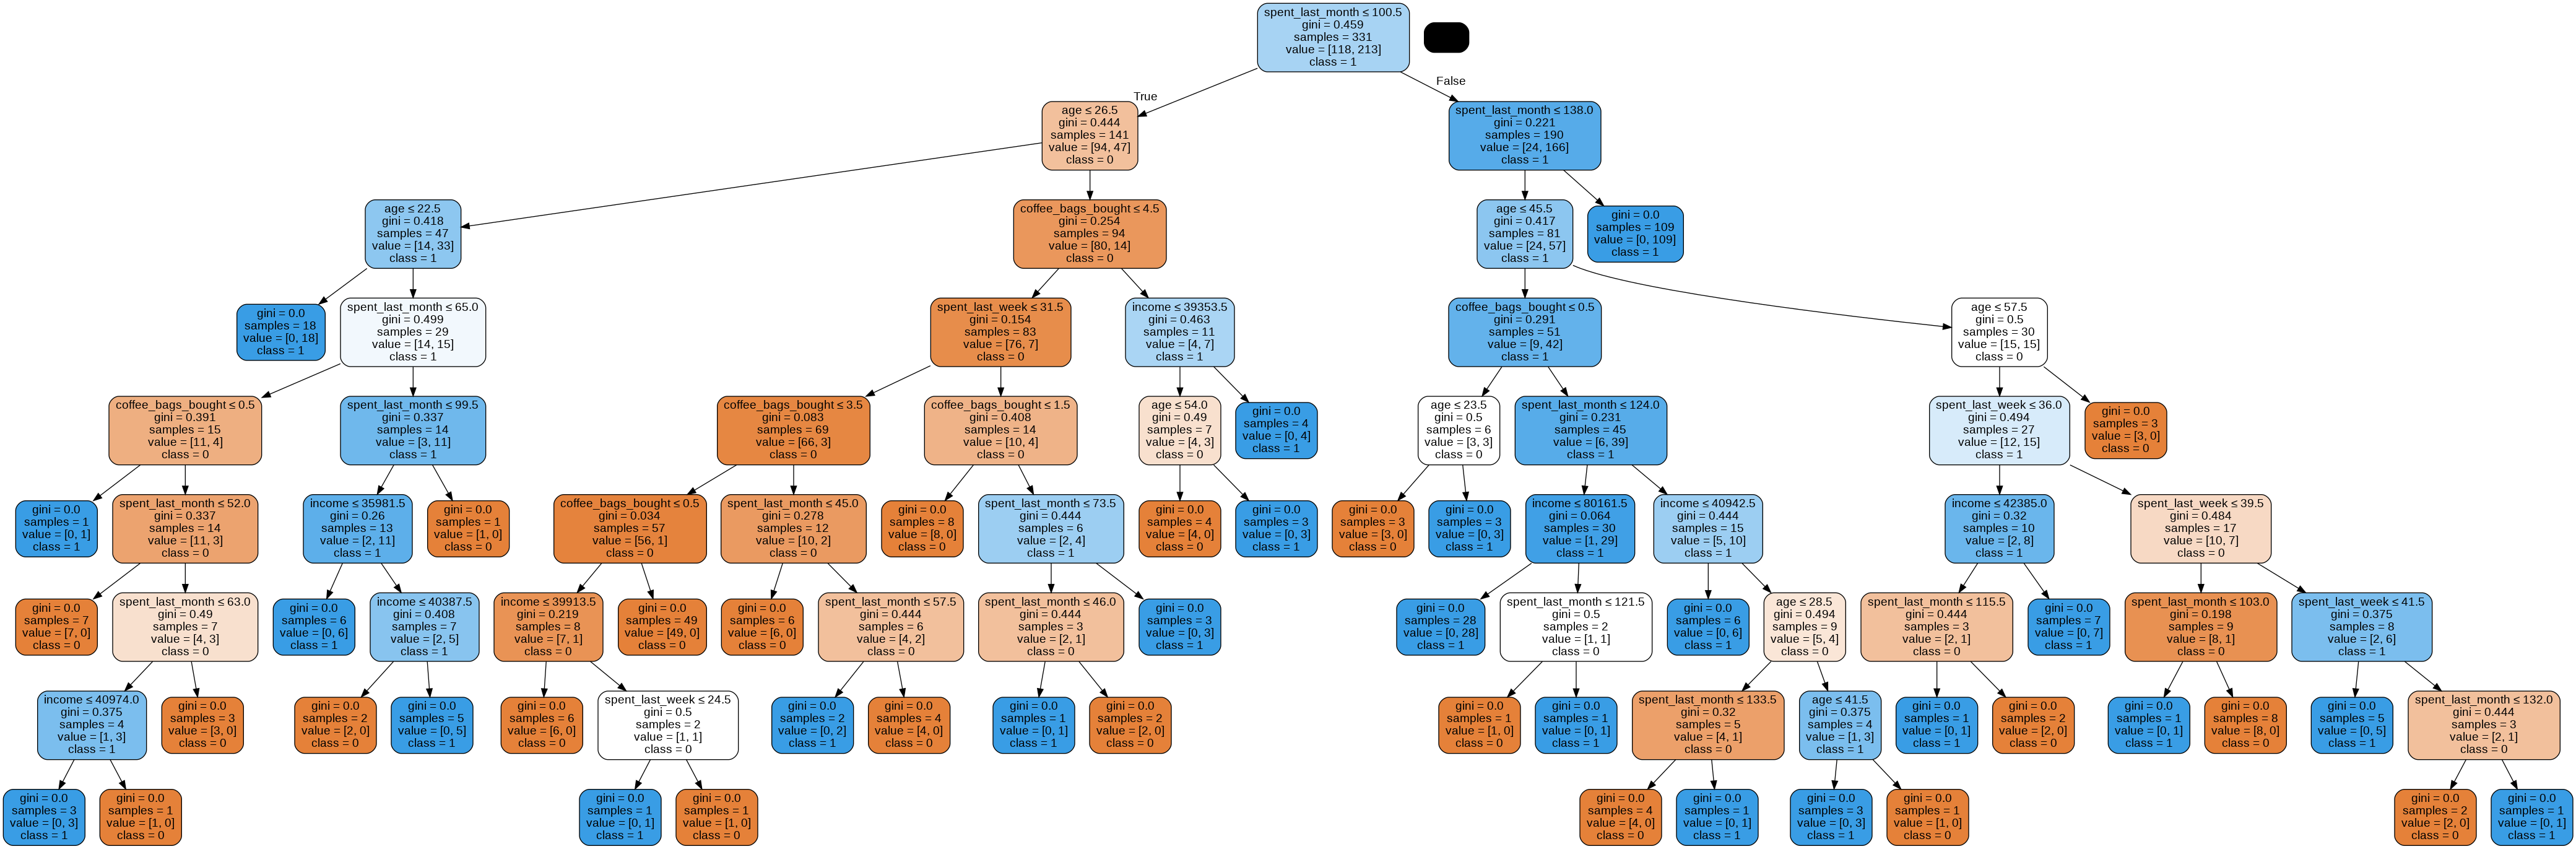

In [158]:
from sklearn.tree import export_graphviz
from sklearn.externals.six  import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [159]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8321678321678322


# Model Accuracy: 83%

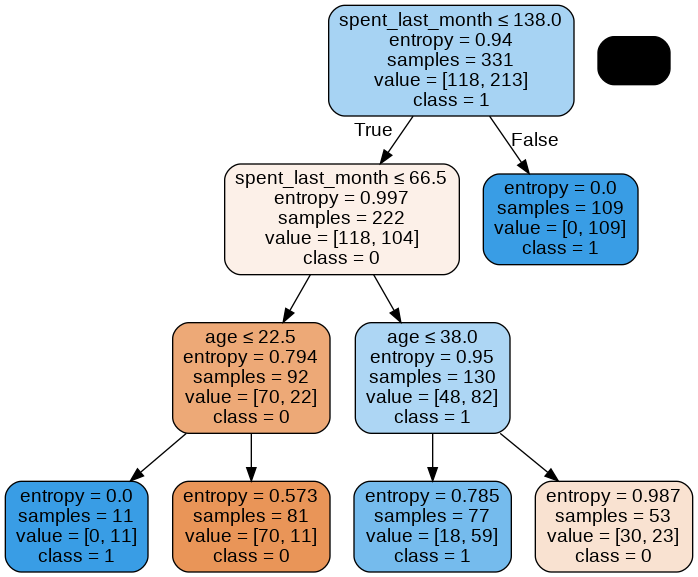

In [160]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [161]:
X_test.head()

,age,coffee_bags_bought,spent_last_week,spent_last_month,income
179,49.0,2.0,50.0,164.0,40303.0
305,23.0,3.0,16.0,44.0,39394.0
31,25.0,0.0,62.0,201.0,52169.0
454,38.0,5.0,0.0,0.0,18467.0
247,21.0,3.0,44.0,129.0,60208.0


In [162]:
# copy of the X_test df before appending prediction column
new_prediction = X_test.copy()
new_prediction.head()

,age,coffee_bags_bought,spent_last_week,spent_last_month,income
179,49.0,2.0,50.0,164.0,40303.0
305,23.0,3.0,16.0,44.0,39394.0
31,25.0,0.0,62.0,201.0,52169.0
454,38.0,5.0,0.0,0.0,18467.0
247,21.0,3.0,44.0,129.0,60208.0


In [163]:
# Append the y_pred column to the test dataset
# Test dataset contains patients whose pregnancy status is not known

new_prediction['Prediction'] = y_pred
new_prediction.head()

,age,coffee_bags_bought,spent_last_week,spent_last_month,income,Prediction
179,49.0,2.0,50.0,164.0,40303.0,1.0
305,23.0,3.0,16.0,44.0,39394.0,0.0
31,25.0,0.0,62.0,201.0,52169.0,1.0
454,38.0,5.0,0.0,0.0,18467.0,0.0
247,21.0,3.0,44.0,129.0,60208.0,1.0


In [164]:
# sorting by index (index=0 or index=1)
new_prediction.sort_index(axis = 0).head()

,age,coffee_bags_bought,spent_last_week,spent_last_month,income,Prediction
4,34.0,0.0,55.0,202.0,91035.0,1.0
5,27.0,0.0,49.0,145.0,43716.0,1.0
6,16.0,0.0,55.0,176.0,4701.0,1.0
11,27.0,0.0,17.0,49.0,32360.0,0.0
13,28.0,0.0,34.0,90.0,41032.0,1.0


In [165]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8321678321678322


# Model Accuracy: 83.2 %

# Kevin Galvan Serrano
## 014687114